# Homework #1 : Networks
### LINMA2472 – Algorithms in Data Science
##### Romain Lemaire, Louis Ryxs ,  

In [1]:
#import packages 

import random
import time
import csv
import numpy as np
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import collections
import community
from community import community_louvain
import statistics as stats
import seaborn as sns
from matplotlib import rc
import pandas as pd
import sklearn
import sklearn.cluster
import scipy
import copy
import matplotlib.cm as cm
import plotly
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

#from igraph import *
pio.renderers.default = "notebook"
print("done")

done


In [2]:
#importing text file
text = []
with open('/Users/romainlemaire/Downloads/WAR-and-PEACE-book1.txt', "r", encoding="utf8" ) as input_f:  #if error: erase encoding="utf8"
    text = input_f.read()

In [3]:
txt_filename = "/Users/romainlemaire/Downloads/WAR-and-PEACE-book1.txt"

text = []
with open(txt_filename, "r") as input_f:
    text = input_f.read()
        
text[:99]
#Print first 99 characters

'CHAPTER I\n\n“Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I '

In [4]:
paragraphs = text.split("\n")#\n is the name for skipping to the next line
paragraphs[2]

'“Well, Prince, so Genoa and Lucca are now just family estates of the'

In [5]:
character_list = [
    "Stepan Stepanovich Adraksin",
    "Father Akinfi",
    "Marya Dmitriyevna Akhrosimova",
    "Tsar Alexander I of Russia",
    "Elizabeth Alexeievna",
    "Yakov Alpatych",
    "Count Arakcheyev",
    "General Baggehufwudt",
    "Prince Bagration",
    "Balaga",
    "General Balashov",
    "Marshal Barclay de Tolly",
    "Barthélemy",
    "Joseph Alexéevich Bazdéev",
    "Makar Alexeyevich Bazdeyev",
    "de Beausset",
    "Belliard",
    "Count Bennigsen",
    "Lieutenant Alphonse Karlovich Berg",
    "Louis Alexandre Berthier",
    "Count Kirill Vladimirovich Bezukhov",
    "Pierre Bezukhov",
    "Bilibin",
    "Bitsky",
    "Maria Bogdanovna",
    "Bolkhovitinov",
    "Prince Andrei Nikolayevich Bolkonsky",
    "Princess Elisabeta",
    "Princess Marya Bolkonskaya",
    "Prince Nikolay Andreevitch Bolkonsky",
    "Napoléon Bonaparte",
    "Vincent Bosse",
    "Mademoiselle Bourienne",
    "General Broussier",
    "Captain Brozin",
    "Agrafena Ivanovna Byelova",
    "General Campan",
    "Marquis de Caulaincourt",
    "General Chatrov",
    "Pavel Vasilievich Chichagov",
    "Carl von Clausewitz",
    "Prince Prince Czartoryski",
    "Danilo",
    "General Davout",
    "Vasily Denisov",
    "Monsieur Dessalles",
    "Lelorme d'Ideville",
    "Dimmler",
    "Dmitri Onufrich",
    "Dmitri Vasileyevich",
    "Prince Dolgorukov",
    "General Dokhturov",
    "Fedor Ivanovich Dolokhov",
    "Maria Ivanovna Dolokhova",
    "Dron Zakhárych",
    "Princess Anna Mikhaylovna Drubetskaya",
    "Boris Drubetskoy",
    "Dunyasha",
    "Eykhen",
    "Colonel Fabvier",
    "Feoktist",
    "Maria Feodorovna",
    "Archduke Ferdinand Karl Joseph of Austria-Este",
    "Filipp",
    "Emperor Francis I of Austria",
    "Baron Funke",
    "Prince Galitzine",
    "Gavrilo",
    "Gerasim",
    "Gervais",
    "Glinka",
    "Major-General Grekov",
    "Maria Hendrihovna",
    "Hvostikov",
    "Ilyin",
    "Iogel",
    "Mikhail Ivanovich",
    "Julner",
    "Julie Karagina",
    "Marya Lvovna Karagina",
    "Platon Karataev",
    "Karp",
    "Andrei Sergeich Kaysarov",
    "Paisi Kaysarov",
    "Kirsten",
    "Count Kochubey",
    "Komarov",
    "Kondratyevna",
    "Piotr Petrovich Konovnitsyn",
    "Prince Kozlovsky",
    "Aline Kuragina",
    "Anatole Kuragin",
    "Hélène Kuragina",
    "Hippolyte Kuragin",
    "Vasili Sergeevich Kuragin",
    "General Kutuzov",
    "Mavra Kuzminishna",
    "Count Langeron",
    "Dominique Jean Larrey",
    "Jacques Lauriston",
    "Lavrushka",
    "Lazarev",
    "Lihachov",
    "Prince Lopuhin",
    "Lorrain",
    "Esaul Lovaisky the Third",
    "General Mack",
    "Magnitsky",
    "Makarin",
    "Malasha",
    "Anna Ignatyevna Malvintsev",
    "Princess Katerina",
    "Princess Sophia Mamontova",
    "Matriona",
    "Mavra",
    "Pelageya Danilovna Melyukova",
    "Métivier",
    "Michaud",
    "Mikhail Nikanorych",
    "General Miloradovich",
    "Mitka",
    "Morel",
    "Abbé Morio",
    "Vicomte Mortemart",
    "General Mouton",
    "Marshal Murat",
    "Nastasya Ivanovna",
    "Prince Nesvitsky",
    "Marshal Ney",
    "Nikolay Nikolayevich Novosiltsev",
    "Count Orlov-Denisov",
    "Count Osterman-Tolstoy",
    "Maria Ignatyevna Peronskaya",
    "Katerina Petrovna",
    "Karl Ludwig von Phull",
    "Count Platov",
    "Prokofy",
    "General Raevsky",
    "Captain Ramballe",
    "Count Jean Rapp",
    "Prince Repnin",
    "Count Rostopchin",
    "Count Ilya Rostov",
    "Countess Natalya Rostova",
    "Natasha Rostova",
    "Nikolai Rostov",
    "Petya Rostov",
    "Vera Rostova",
    "Praskovya Savishna",
    "Anna Pavlovna Scherer",
    "General Schmitt",
    "Madame Schoss",
    "Shapovalov",
    "Shcherbinin",
    "Pyotr Nikolaitch Shinshin",
    "Smolyaninov",
    "Sonya",
    "Count Speransky",
    "Stevens",
    "Stolypin",
    "Suhtelen",
    "Semeon Tchekmar",
    "Lieutenant Telyanin",
    "Theodosia",
    "Tikhon Shtcherbatov",
    "Tikhon",
    "Timohin",
    "Capt. von Toll",
    "General Weyrother",
    "Willarski",
    "General Wintzingerode",
    "General Wolzogen",
    "Captain Yakovlev",
    "General Yermolov",
    "Zakhar",
    "Zdrzhinsky",
    "Zherkov",
    "Count Zhilinsky"
]

# Create a DataFrame with an 'ID' column
characters = pd.DataFrame({'ID': range(1, len(character_list) + 1), 'names': character_list})


# Display the DataFrame
print(characters)

      ID                          names
0      1    Stepan Stepanovich Adraksin
1      2                  Father Akinfi
2      3  Marya Dmitriyevna Akhrosimova
3      4     Tsar Alexander I of Russia
4      5           Elizabeth Alexeievna
..   ...                            ...
173  174               General Yermolov
174  175                         Zakhar
175  176                     Zdrzhinsky
176  177                        Zherkov
177  178                Count Zhilinsky

[178 rows x 2 columns]


In [6]:
chapter = text.split("CHAPTER")

In [7]:
chapter[1]

' I\n\n“Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don’t tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by that\nAntichrist—I really believe he is Antichrist—I will have nothing\nmore to do with you and you are no longer my friend, no longer my\n‘faithful slave,’ as you call yourself! But how do you do? I see I\nhave frightened you—sit down and tell me all the news.”\n\nIt was in July, 1805, and the speaker was the well-known Anna Pávlovna\nSchérer, maid of honor and favorite of the Empress Márya Fëdorovna.\nWith these words she greeted Prince Vasíli Kurágin, a man of high\nrank and importance, who was the first to arrive at her reception. Anna\nPávlovna had had a cough for some days. She was, as she said, suffering\nfrom la grippe; grippe being then a new word in St. Petersburg, used\nonly by the elite.\n\nAll her invitations without exception, written in French, and delivered\

In [8]:
#chapter 0
for personnage in (characters['names']):
    #print(personnage.split(' '))
    for n in personnage.split():
        if n in chapter[1]:
            print(f'{personnage} in chapter 1')

Tsar Alexander I of Russia in chapter 1
Tsar Alexander I of Russia in chapter 1
Tsar Alexander I of Russia in chapter 1
Tsar Alexander I of Russia in chapter 1
Count Arakcheyev in chapter 1
Prince Bagration in chapter 1
Marshal Barclay de Tolly in chapter 1
de Beausset in chapter 1
Count Bennigsen in chapter 1
Count Kirill Vladimirovich Bezukhov in chapter 1
Prince Andrei Nikolayevich Bolkonsky in chapter 1
Princess Elisabeta in chapter 1
Princess Marya Bolkonskaya in chapter 1
Prince Nikolay Andreevitch Bolkonsky in chapter 1
Marquis de Caulaincourt in chapter 1
Prince Prince Czartoryski in chapter 1
Prince Prince Czartoryski in chapter 1
Prince Dolgorukov in chapter 1
Princess Anna Mikhaylovna Drubetskaya in chapter 1
Princess Anna Mikhaylovna Drubetskaya in chapter 1
Archduke Ferdinand Karl Joseph of Austria-Este in chapter 1
Emperor Francis I of Austria in chapter 1
Emperor Francis I of Austria in chapter 1
Emperor Francis I of Austria in chapter 1
Emperor Francis I of Austria in c

In [9]:
#dataframe of occurences of personnage by page
occurence_chapter = pd.DataFrame(0,columns=[characters['names']], index=(i for i in range(len(chapter))))

In [10]:
#add 1 if a specific personnage is in a specific chapter
for i in range(len(chapter)):
    for personnage in (characters['names']):
    #print(personnage.split(' '))
        for n in personnage.split():
            if n in chapter[i]:
                occurence_chapter.loc[[i], [personnage]] += 1
                break

In [11]:
#create the confusion matrix by dot product
occurence = occurence_chapter.T.dot(occurence_chapter)
#fill diagonal with 0
np.fill_diagonal(occurence.values, 0)

In [12]:
#drop all rows filled with zeros i.e. characters (from csv data file) having no interactions
occurence = occurence.loc[(occurence != 0).any(axis=1)]
for i in occurence.columns:
    if i not in occurence.index:
        occurence.drop(i, axis=1, inplace=True)

occurence.head(10)

names,Father Akinfi,Tsar Alexander I of Russia,Elizabeth Alexeievna,Count Arakcheyev,General Baggehufwudt,Prince Bagration,General Balashov,Marshal Barclay de Tolly,de Beausset,Count Bennigsen,...,Pyotr Nikolaitch Shinshin,Count Speransky,Stevens,Lieutenant Telyanin,Capt. von Toll,General Weyrother,General Wintzingerode,General Wolzogen,General Yermolov,Count Zhilinsky
names,,,,,,,,,,,,,,,,,,,,,
Father Akinfi,0,3,0,2,1,3,1,3,3,2,...,0,2,0,0,0,1,1,1,1,2
Tsar Alexander I of Russia,3,0,1,17,2,21,2,28,28,17,...,1,17,1,1,1,2,3,2,2,17
Elizabeth Alexeievna,0,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Count Arakcheyev,2,17,0,0,1,13,1,17,17,17,...,1,17,0,1,1,1,2,1,1,17
General Baggehufwudt,1,2,0,1,0,2,2,2,2,1,...,0,1,0,0,0,2,2,2,2,1
Prince Bagration,3,21,1,13,2,0,2,21,21,13,...,1,13,1,0,1,2,3,2,2,13
General Balashov,1,2,0,1,2,2,0,2,2,1,...,0,1,0,0,0,2,2,2,2,1
Marshal Barclay de Tolly,3,28,1,17,2,21,2,0,28,17,...,1,17,1,1,1,2,3,2,2,17
de Beausset,3,28,1,17,2,21,2,28,0,17,...,1,17,1,1,1,2,3,2,2,17


In [13]:
#Here we need to set the nodes and edges of the graph to create it

#list of all characters appearing in the text to set the nodes of the graph
nod=[]
for i in occurence.index:
    nod.append(str(i).strip("/(),'"))

#set the edges of the graph
edg=[]
for i in range(len(occurence)):
    for j in range(len(occurence)):
        if occurence.iloc[i,j] != 0:
            edg.append( (str(occurence.index[i]).strip("/(),'"),
                         str(occurence.index[j]).strip("/(),'"),
                        occurence.iloc[i,j]) )
print(edg[:3])
print(nod[:3])


nod_3= nod.copy()
edg_3= edg.copy()

[('Father Akinfi', 'Tsar Alexander I of Russia', 3), ('Father Akinfi', 'Count Arakcheyev', 2), ('Father Akinfi', 'General Baggehufwudt', 1)]
['Father Akinfi', 'Tsar Alexander I of Russia', 'Elizabeth Alexeievna']


In [14]:
plt.figure()
G=nx.Graph()
G.add_nodes_from(nod)
G.add_weighted_edges_from(edg)
weight=nx.get_edge_attributes(G,'weight')
threshold=90

#this is to set the size of the nodes according to the number of occurence of the character in the text
most_popu=occurence.sum(axis=1).sort_values(ascending=False)
harry=most_popu[0]
most_popu=(most_popu/harry)*100

#if value of most_popu < than mean of most_popu then set value to mean of most_popu
mean_most_popu=most_popu.mean() 

for i in range(len(most_popu)):
    if most_popu[i] < mean_most_popu:
        most_popu[i] = mean_most_popu

# create dictionary for the ten most popular characters
most_popu_10 = most_popu.head(10)
val = most_popu_10.values  #get values

lab_10_most_popu = []     #get name label as strings for most_popu_10 (type=pandas.Series)
for name in most_popu_10.index:
    name = str(name).strip("()',")
    lab_10_most_popu.append(name)

dict_10 = {lab_10_most_popu [i] : val[i] for i in range(len(val))}

<Figure size 432x288 with 0 Axes>

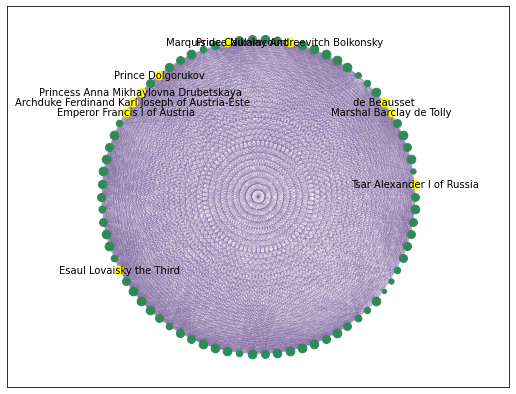

In [15]:
#get node size and store them in an array
list_nodes = list(G.nodes())
nodes_size = np.array([len(list(G.neighbors(node))) for node in list_nodes])

#let's build the graph
plt.figure(figsize=(9,7))
pos=nx.layout.circular_layout(G)

#draw the nodes proportional to the number of occurence
for count, nod in enumerate(G.nodes()):
    nod_lab = ( "", f"{nod}")
    nx.draw_networkx_nodes( 
        G, pos, nodelist=[nod], node_size=nodes_size[count],
        node_color='yellow' if nod in dict_10.keys() else 'seagreen', 
        label = nod_lab[1] if nod in dict_10.keys() else nod_lab[0]
        )

#draw the edges with the weight of the edge proportional to the number of occurence
nx.draw_networkx_edges(G, pos, edgelist=edg, width=most_popu/1000, edge_color="#6A4C93", alpha=0.8 , arrows=False)

#set legend for 10 most popular characters
nx.draw_networkx_labels(G, pos, labels={k:k for k in dict_10.keys()}, font_size=10)
#plt.legend(dict_10.keys(),loc='upper left',bbox_to_anchor=(1,1))
    
plt.xlim(-1.6,1.6)

#plt.savefig('./circumar_network', dpi=300)
plt.show()

In [16]:
G_2=nx.DiGraph()
G_2.add_nodes_from(nod)
G_2.add_weighted_edges_from(edg)
weight=nx.get_edge_attributes(G_2,'weight')
threshold=90

/var/folders/s4/8gyj_dtd4hn1nw45dcb5dqxw0000gn/T/ipykernel_3924/927220486.py:4: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



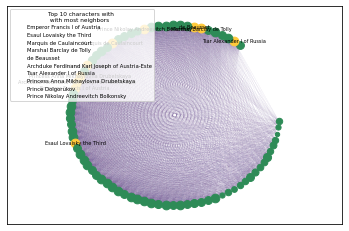

In [17]:
#create a customed width of edges
list_edges = list(G_2.edges())
edges_weight = np.array([G_2[u][v].get('weight', 1) for u, v in list_edges])
custom_width = [max((w/10000,w/200)[w > 30], 0.03) for w in edges_weight]

#get node size and store them in an array
list_nodes = list(G_2.nodes())

nodes_size = np.array([len(list(G_2.neighbors(node))) for node in list_nodes])

#let's build the graph
pos=nx.layout.circular_layout(G_2)

#draw the nodes proportional to the number of occurence
for count, nod in enumerate(G_2.nodes()):
    nod_lab = ( "", f"{nod}")
    nx.draw_networkx_nodes( 
        G_2, pos, nodelist=[nod], node_size=nodes_size[count],
        node_color='#FFCA3A' if nod in dict_10.keys() else 'seagreen', 
        label = nod_lab[1] if nod in dict_10.keys() else nod_lab[0]
        )

#draw the edges with the weight of the edge proportional to the number of occurence
nx.draw_networkx_edges(G_2, pos, edgelist=edg, width=custom_width, edge_color="#6A4C93", alpha=0.8 , arrows=False)

#set legend for 10 most popular characters
nx.draw_networkx_labels(G_2, pos, labels={k:k for k in dict_10.keys()}, font_size=5)
plt.legend(dict_10.keys(),loc='upper left',prop={'size': 5.3}, labelcolor='black', title='Top 10 characters with \n with most neighbors', title_fontsize="xx-small")
ax = plt.gca()
leg = ax.get_legend()
#set color of nodes in the legend
for i in range(0,10):   
    leg.legendHandles[i].set_color("#FFCA3A")
       
plt.xlim(-1.6,1.6)

#plt.savefig('./circular_network_neat', dpi=500)
plt.show()

The average degree of a node is 64.436


OSError: [Errno 30] Read-only file system: './spring_network_gradient.png'

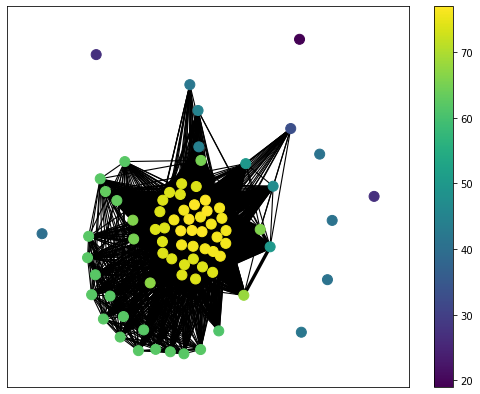

In [18]:
# Spring plot to vizualize communities
# Gradient color correspond to nodes degree
plt.figure(figsize=(9,7))
pos2 = nx.spring_layout(G, seed=4, k=0.5)
deg = [val for (node, val) in G.degree()]

weight_of_edges = list(nx.get_edge_attributes(G, "weight").values())
print('The average degree of a node is '+ str(round(np.mean(deg),3)))
norm_weight = (np.array(weight_of_edges)-min(weight_of_edges))/(max(weight_of_edges)-min(weight_of_edges))

node = nx.draw_networkx_nodes(G, pos=pos2, node_size=100, cmap='viridis', node_color=deg)
nx.draw_networkx_edges(G, pos=pos2, alpha=1, width=norm_weight*30, edge_color='black')
plt.colorbar(node)
#plt.title('Coloring based on nodes degree')
plt.savefig('./spring_network_gradient', dpi=300)
plt.show()

In [19]:
#nodes of the graphs directly by the dataframe (non directed graph)
G = nx.from_pandas_adjacency(occurence)
#compute the degree assortativity of the graphs
degreeAssortativity = nx.degree_assortativity_coefficient(G, weight="weight")
print('Degree assortativity is : ' + str(round(degreeAssortativity,4)))

Degree assortativity is : -0.1942


OSError: [Errno 30] Read-only file system: './degree_distribution.png'

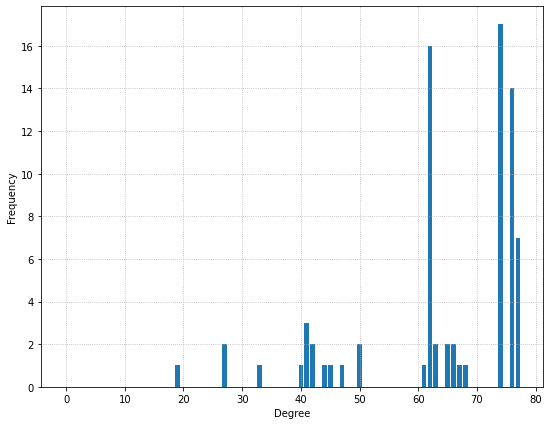

In [20]:
#distribution of the degree explain (a bit) why we have a low correlation (degree assortativity)
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(9, 7))
plt.bar(degrees, degree_freq)
plt.grid(linestyle=':')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.savefig('./degree_distribution', dpi=300)
plt.show()

OSError: [Errno 30] Read-only file system: './Louvain_algo.png'

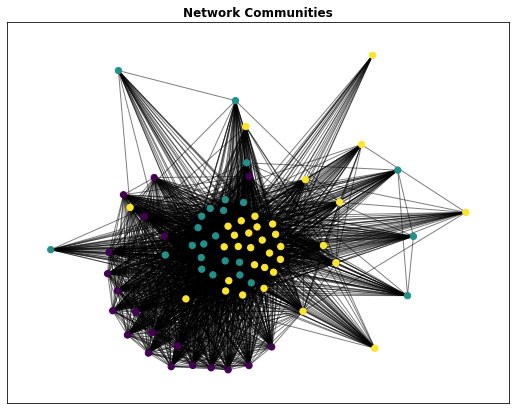

In [21]:
# Louvain algorithms

partition = community_louvain.best_partition(G)
f = plt.figure(figsize=(9, 7))
ax = f.add_subplot(1,1,1)
pos = nx.spring_layout(G, seed = 4, k=0.5)

cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()), ax=ax)

nx.draw_networkx_edges(G, pos, alpha=0.5)
#f.tight_layout()
plt.axis('on')
f.set_facecolor('w')
plt.title('Network Communities',fontweight ="bold")

plt.savefig('./Louvain_algo', dpi=300)
plt.show()



OSError: [Errno 30] Read-only file system: './laplacian.png'

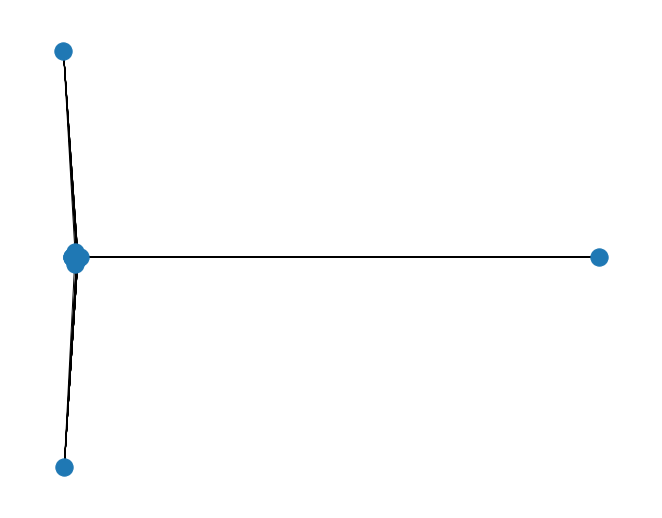

In [22]:
# Draw the differents communities in 2D with the Laplacian method
plt.figure(figsize=(9,7))

spectral_pos = nx.spectral_layout(G)
nx.draw(G, pos=spectral_pos)

plt.savefig('./laplacian', dpi=300)
plt.show()